## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>


## Import Statements


In [2]:
import pandas as pd

## Data Exploration


**Challenge**: Read the .csv file and store it in a Pandas dataframe


In [21]:
stack_overflow_data = pd.read_csv(filepath_or_buffer="QueryResults.csv" ,header=0, names=["DATE", "TAG", "POSTS"])
# pivot_df = stack_overflow_data.pivot(index="TAG", columns="DATE", values="POSTS")
# pivot_df.head()

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe


In [3]:
stack_overflow_data.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?


In [4]:
stack_overflow_data.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe


In [5]:
stack_overflow_data.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?


In [6]:
stack_overflow_data.groupby('TAG')['POSTS'].sum()

TAG
assembly        34852
c              336042
c#            1423530
c++            684210
delphi          46212
go              47499
java          1696403
javascript    2056510
perl            65286
php           1361988
python        1496210
r              356799
ruby           214582
swift          273055
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
stack_overflow_data.groupby(by='TAG').count()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"


In [ ]:
stack_overflow_data.DATE[1]

In [17]:
type(stack_overflow_data.DATE[1])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
print(pd.to_datetime(stack_overflow_data.DATE[1]))
stack_overflow_data.DATE = pd.to_datetime(stack_overflow_data.DATE)


2008-08-01 00:00:00


## Data Manipulation


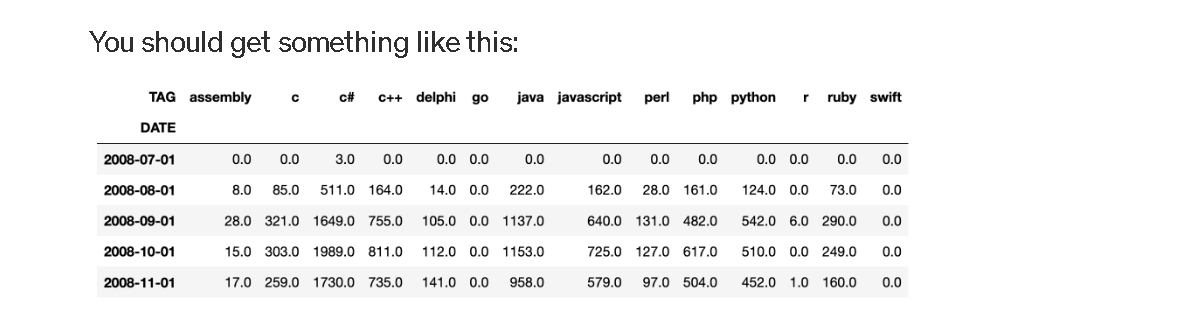


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.


In [23]:
reshaped_df = stack_overflow_data.pivot(index='DATE', columns='TAG', values='POSTS')


In [24]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [25]:
reshaped_df.shape

(145, 14)

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?


In [26]:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [47]:
reshaped_df.fillna(value=0 , inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [35]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.


In [42]:
import matplotlib.pyplot as plt

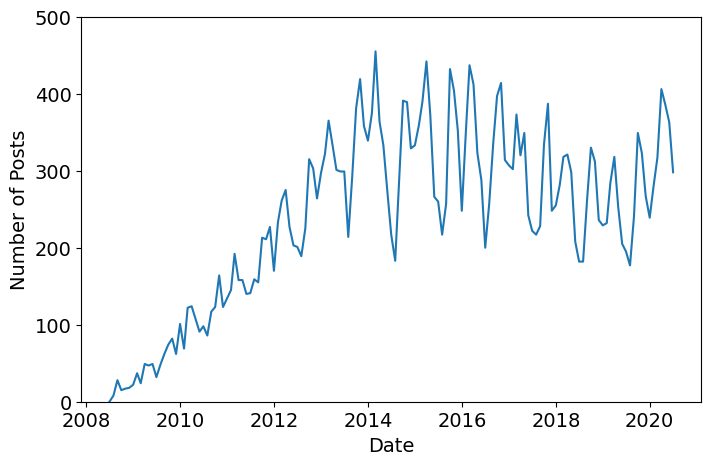

In [60]:
plt.figure(figsize=(8,5)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,500)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.plot(reshaped_df.index, reshaped_df['assembly'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.


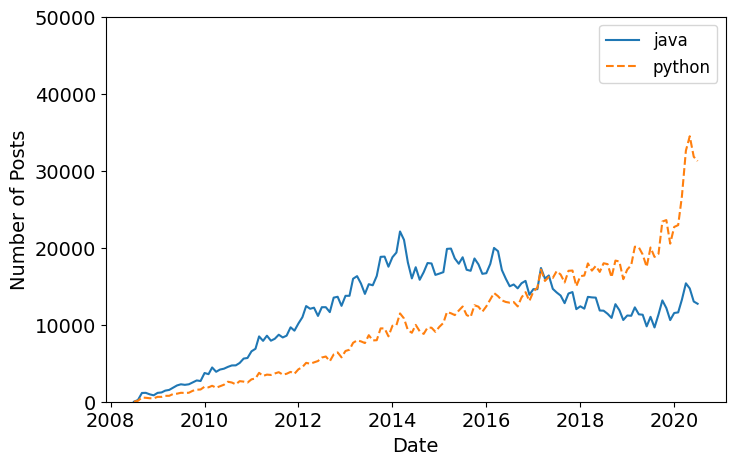

In [76]:
plt.figure(figsize=(8,5)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,50000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

# Plot 'java' with a solid line and 'python' with a dashed line
plt.plot(reshaped_df.index, reshaped_df['java'], label='java', linestyle='-')
plt.plot(reshaped_df.index, reshaped_df['python'], label='python', linestyle='--')
# Adding a legend
plt.legend(fontsize=12)


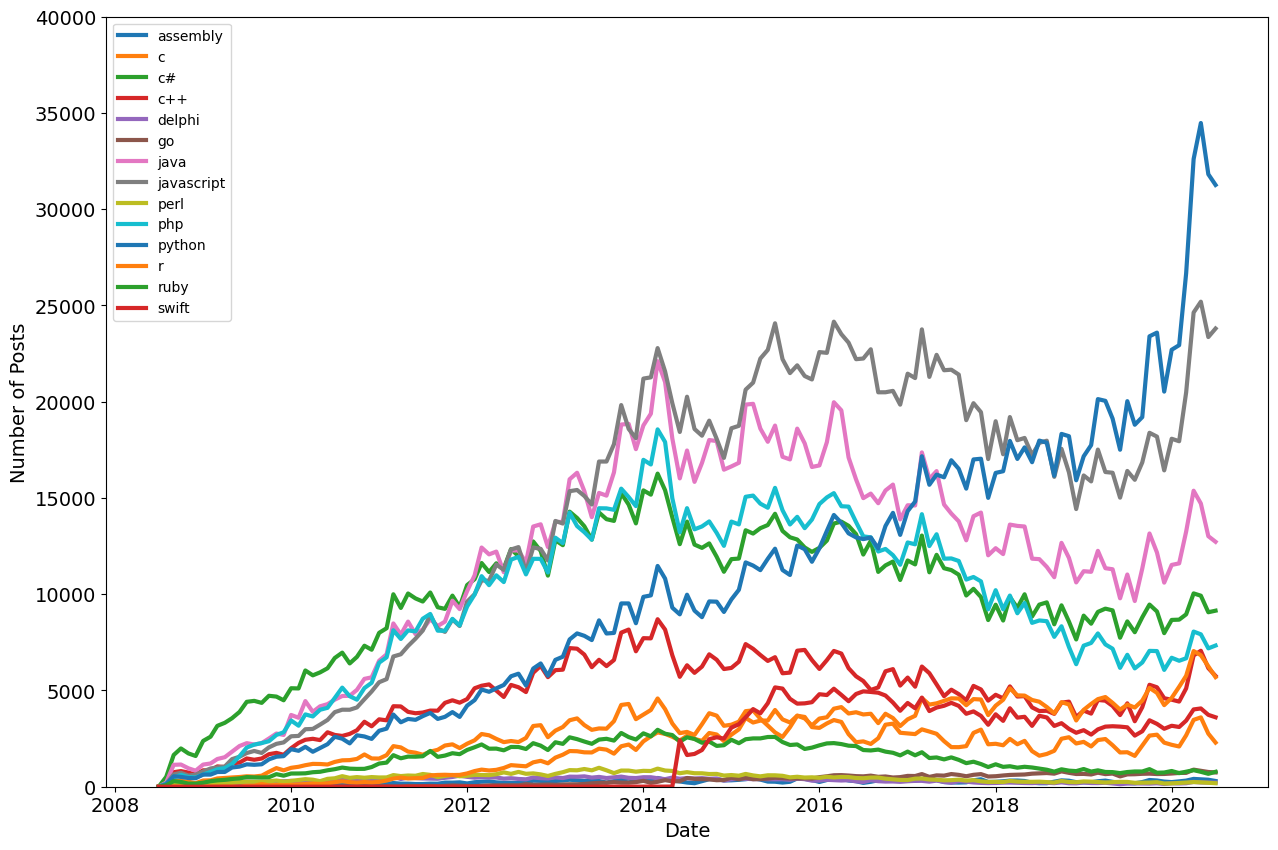

In [99]:
plt.figure(figsize=(15,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,40000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

for column in reshaped_df.columns , :
    # plt.plot(reshaped_df.index, reshaped_df[column] , linewidth=3)
    plt.plot(reshaped_df.index, reshaped_df[column] , linewidth=3, label=column)
plt.legend(fontsize=10)



# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).


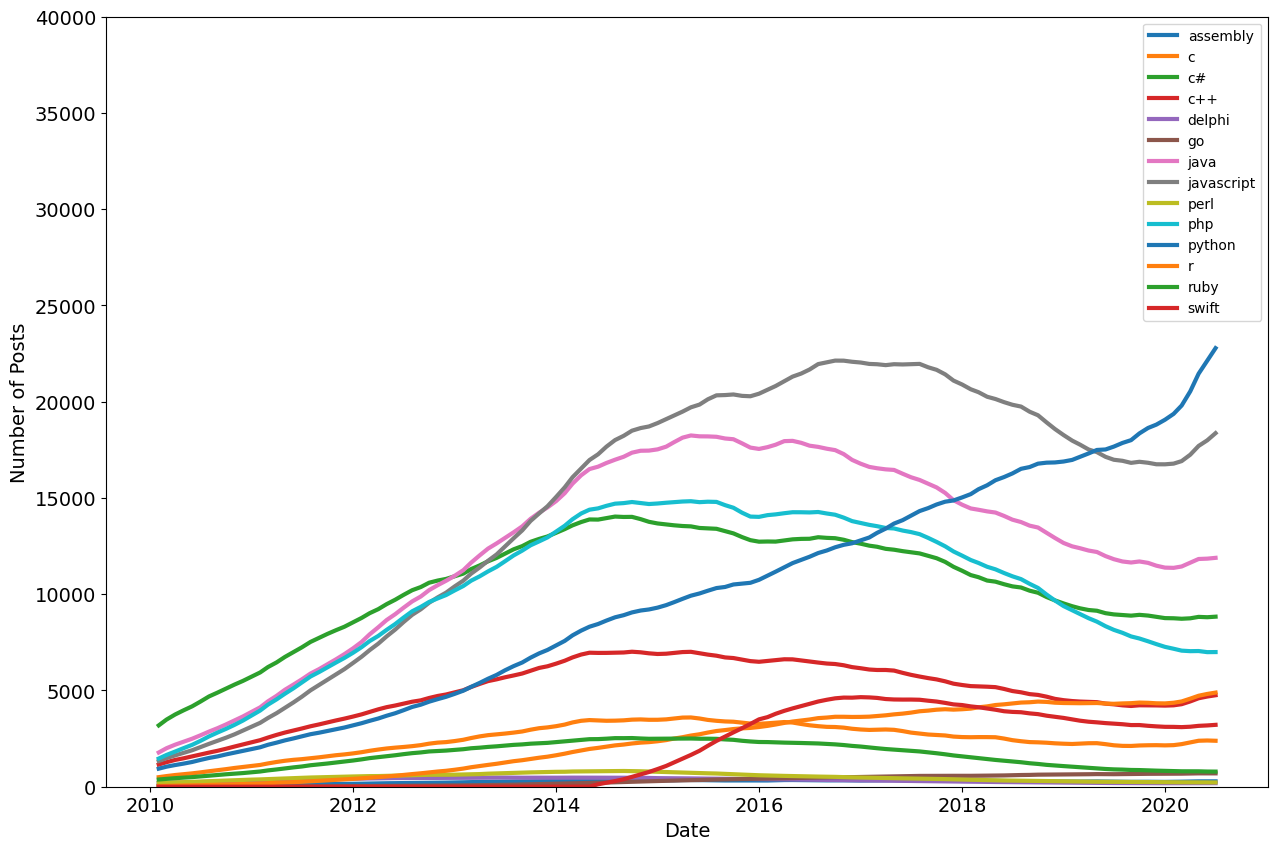

In [116]:
plt.figure(figsize=(15,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0,40000)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)

roll_df = reshaped_df.rolling(window=20).mean()
 
for column in reshaped_df.columns , :
    # plt.plot(reshaped_df.index, reshaped_df[column] , linewidth=3)
    plt.plot(roll_df.index, roll_df[column] , linewidth=3, label=column)
plt.legend(fontsize=10)

